# Loading dataset

In [40]:
#Sequential API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, Model

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [10]:
X_train = X_train / 255.
X_valid = X_valid / 255.

# Sequential API

In [38]:
model = keras.Sequential(
    [
        Input(shape=(32, 32, 3)),
        Conv2D(32, 3, padding="valid", activation="relu"),
        MaxPooling2D(),
        Conv2D(64, 3, activation="relu"),
        MaxPooling2D(),
        Conv2D(128, 3, activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10),
    ]
)

# Functional API

In [24]:
from tensorflow.keras.activations import relu

In [82]:
def my_model():
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, 3)(inputs)
    x = BatchNormalization()(x)
    x = relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3)(x)
    x = BatchNormalization()(x)
    x = relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, 3)(x)
    x = BatchNormalization()(x)
    x = relu(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(10)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [84]:
model = my_model()

In [86]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_13 (ReLU)                      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_14 (ReLU)                      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,010 (656.29 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [88]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=["accuracy"],
)

In [92]:
history = model.fit(X_train, y_train, batch_size=64, validation_data = (X_valid, y_valid), epochs=5, verbose=2)

Epoch 1/5
79/79 - 11s - 134ms/step - accuracy: 0.9950 - loss: 0.0234 - val_accuracy: 0.8546 - val_loss: 0.5304
Epoch 2/5
79/79 - 13s - 168ms/step - accuracy: 0.9978 - loss: 0.0148 - val_accuracy: 0.8625 - val_loss: 0.5241
Epoch 3/5
79/79 - 19s - 246ms/step - accuracy: 0.9988 - loss: 0.0090 - val_accuracy: 0.8599 - val_loss: 0.5444
Epoch 4/5
79/79 - 13s - 159ms/step - accuracy: 0.9978 - loss: 0.0107 - val_accuracy: 0.8609 - val_loss: 0.5882
Epoch 5/5
79/79 - 21s - 262ms/step - accuracy: 0.9998 - loss: 0.0049 - val_accuracy: 0.8635 - val_loss: 0.5763


<Axes: >

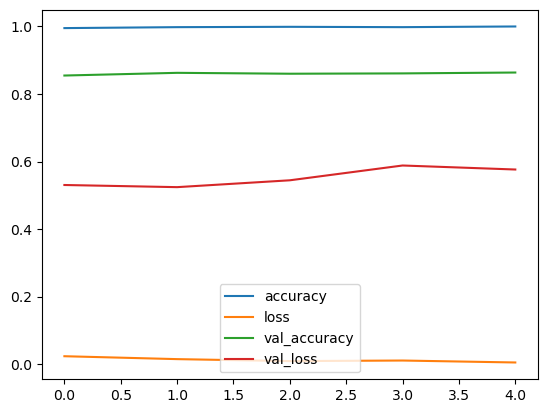

In [94]:
import pandas as pd

pd.DataFrame(history.history).plot()